In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/rtsd-class.zip -d /content/drive/MyDrive

In [ ]:
# Train images
# !ls /content/drive/MyDrive/rtsd-r1/train | wc -l
# Test images
# !ls /content/drive/MyDrive/rtsd-r1/test | wc -l

016789.png
023619.png
014850.png
013240.png
020184.png
017393.png
025363.png
017652.png
015256.png
013400.png


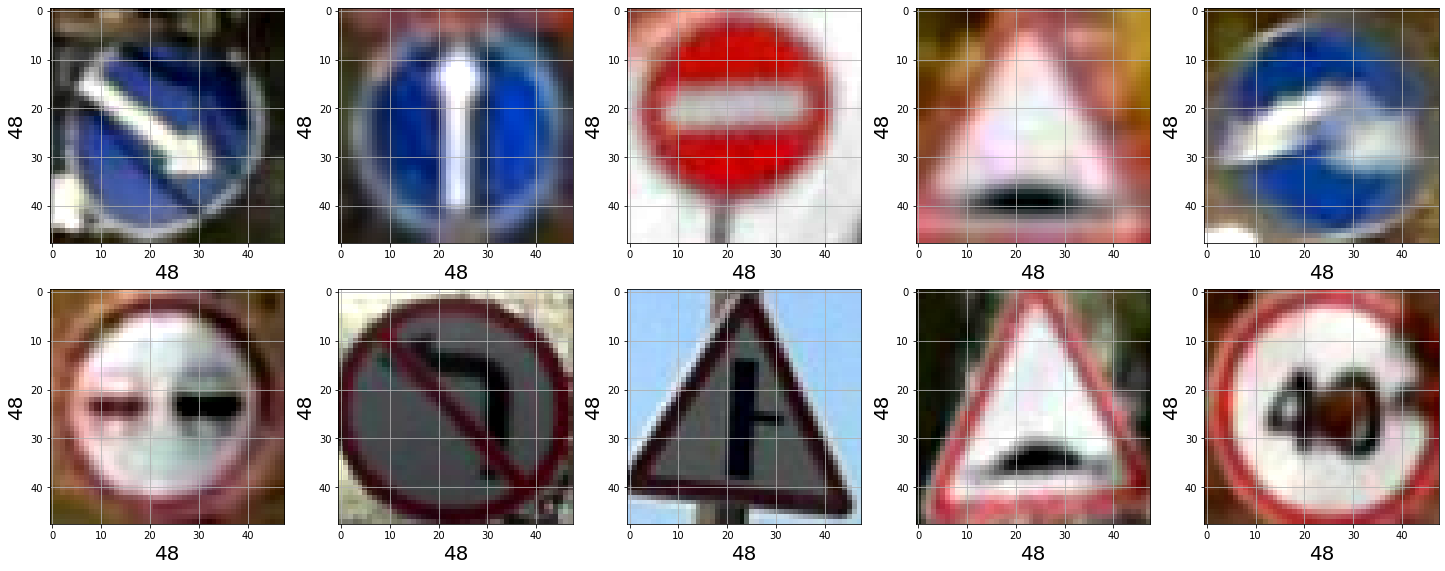

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

train_folder = "/content/drive/MyDrive/rtsd-r1/train/"
train_imgs = os.listdir(train_folder)

test_folder = "/content/drive/MyDrive/rtsd-r1/test/"
test_imgs = os.listdir(test_folder)

plt.figure(figsize=(25,25))

for i in range(0,10):
    plt.subplot(5,5,i+1)
    train_img_path = train_folder + '/' + train_imgs[i]
    print(train_imgs[i])
    train_img = imread(train_img_path)
    plt.imshow(train_img)
    plt.grid(b=None)
    plt.xlabel(train_img.shape[1], fontsize = 20)
    plt.ylabel(train_img.shape[0], fontsize = 20)

005801.png
006380.png
006000.png
005851.png
005852.png
006343.png
006355.png
005813.png
006291.png
005954.png


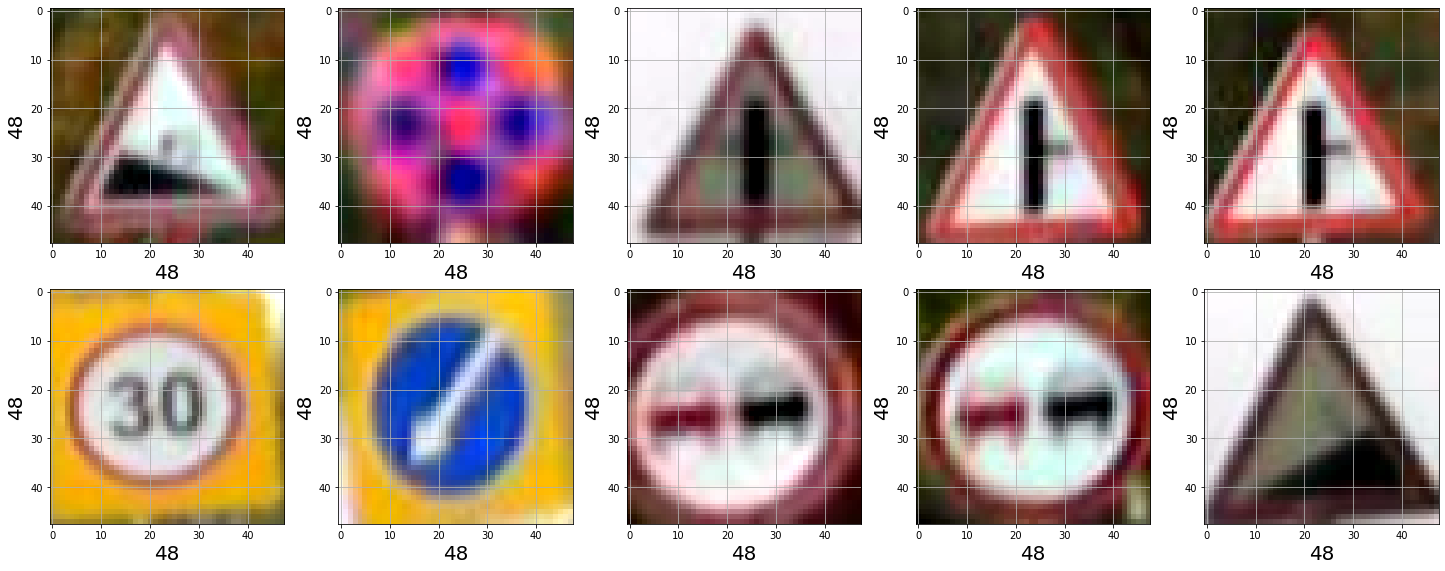

In [ ]:
plt.figure(figsize=(25,25))

for i in range(0,10):
    plt.subplot(5,5,i+1)
    test_img_path = test_folder + '/' + test_imgs[i]
    print(test_imgs[i])
    test_img = imread(test_img_path)
    plt.imshow(test_img)
    plt.grid(b=None)
    plt.xlabel(test_img.shape[1], fontsize = 20)
    plt.ylabel(test_img.shape[0], fontsize = 20)

In [ ]:
train_imgs = sorted(train_imgs)
test_imgs = sorted(test_imgs)

In [ ]:
import pandas as pd
train_csv = pd.read_csv("/content/drive/MyDrive/rtsd-r1/gt_train.csv")
test_csv = pd.read_csv("/content/drive/MyDrive/rtsd-r1/gt_test.csv")

In [ ]:
train_labels = train_csv['class_number']
test_labels = test_csv['class_number']

In [ ]:
import cv2
import tensorflow as tf
from PIL import Image

In [ ]:
height = 48
width = 48
channels = 3
classes = 67
n_inputs = height * width * channels

train_data = []

for i in train_imgs:
  path = "/content/drive/MyDrive/rtsd-r1/train/{0}".format(i)
  image = cv2.imread(path)
  print(i)
  image_from_array = Image.fromarray(image, 'RGB')
  size_image = image_from_array.resize((height, width))
  train_data.append(np.array(size_image))

In [ ]:
height = 48
width = 48
channels = 3
classes = 67
n_inputs = height * width * channels

train_data = []

for i in train_imgs:
  path = "/content/drive/MyDrive/rtsd-r1/train/{0}".format(i)
  image = cv2.imread(path)
  print(i)
  image_from_array = Image.fromarray(image, 'RGB')
  size_image = image_from_array.resize((height, width))
  train_data.append(np.array(size_image))
  
test_data = []

for i in test_imgs:
  path = "/content/drive/MyDrive/rtsd-r1/test/{0}".format(i)
  image = cv2.imread(path)
  print(i)
  image_from_array = Image.fromarray(image, 'RGB')
  size_image = image_from_array.resize((height, width))
  test_data.append(np.array(size_image))

In [ ]:
X_np_train = np.array(train_data)
y_np_train = np.array(train_labels)

X_np_test = np.array(test_data)
y_np_test = np.array(test_labels)

In [ ]:
(X_train, X_val) = X_np_train[(int)(0.2 * len(X_np_train)):], X_np_train[:(int)(0.2 * len(X_np_train))]
X_train = X_train.astype('float32') / 255 
X_val = X_val.astype('float32') / 255
(y_train, y_val) = y_np_train[(int)(0.2 * len(y_np_train)):], y_np_train[:(int)(0.2 * len(y_np_train))]

from keras.utils import to_categorical
y_train = to_categorical(y_train, classes)
y_val = to_categorical(y_val, classes)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=48, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(67, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [ ]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

Epoch 1/20
636/636 [==============================] - 40s 12ms/step - loss: 1.9084 - accuracy: 0.5523 - val_loss: 0.7697 - val_accuracy: 0.8464
Epoch 2/20
636/636 [==============================] - 7s 11ms/step - loss: 0.4444 - accuracy: 0.8801 - val_loss: 0.6373 - val_accuracy: 0.8716
Epoch 3/20
636/636 [==============================] - 7s 11ms/step - loss: 0.2821 - accuracy: 0.9209 - val_loss: 0.6296 - val_accuracy: 0.8928
Epoch 4/20
636/636 [==============================] - 7s 11ms/step - loss: 0.2054 - accuracy: 0.9411 - val_loss: 0.4944 - val_accuracy: 0.9023
Epoch 5/20
636/636 [==============================] - 7s 11ms/step - loss: 0.1772 - accuracy: 0.9451 - val_loss: 0.5082 - val_accuracy: 0.9011
Epoch 6/20
636/636 [==============================] - 7s 11ms/step - loss: 0.1385 - accuracy: 0.9604 - val_loss: 0.5316 - val_accuracy: 0.9072
Epoch 7/20
636/636 [==============================] - 7s 11ms/step - loss: 0.1277 - accuracy: 0.9614 - val_loss: 0.4725 - val_accuracy: 0.921

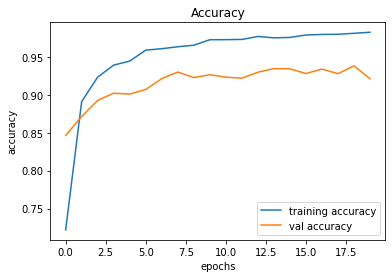

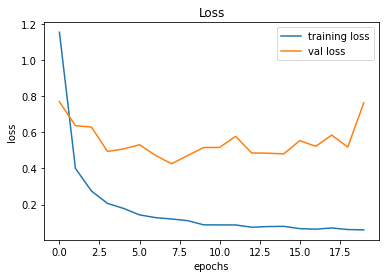

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
X_test = X_np_test.astype('float32') / 255 
pred = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_np_test, pred)

0.9006754072308304

In [ ]:
model.save('/content/drive/MyDrive/rtsd-class-weights')

In [ ]:
model.save_weights('/content/drive/MyDrive/rtsd-class-weights/weights.h5')